# Trabajo Práctico Final - Parte 1

## Sección 1 - Presentación del problema específico.

**Descripción:** Dataset que describe las variables y la calidad del vino

La calidad es el atributo más importante en un vino. A diferencia de otras características que involucran plenamente a la subjetividad de quien lo bebe (no solo el gusto personal sino también los recuerdos y emociones que un vino evoca), el concepto de calidad es puramente objetivo. 

En el caso particular de la vitivinicultura, la calidad de un ejemplar involucra un sinfín de factores relacionados con la elaboración: desde la finca hasta la guarda.  

Motiva el estudio del siguiente Dataset poder aportar informacion y herramientas a aquellos productores de vinos que quieran producir dicha bebida de la mejor manera posible buscando la calidad necesaria a fin de poder incrementar sus ventas cosiderablemente como tambien asi enfocarse en los factores tecnicos que realmente realzan la calidad aprovechando los recursos de manera mas eficiente.

## Sección 2 - Preguntas y objetivos de la investigación.

### *Preguntas Generales:*

*   ¿Cuáles son las variables que podrían afectarían a la calidad del vino?
*   ¿Es necesario aumentar o disminuir la cantidad de dichas variables para aumentar la calidad?
*   ¿Cuál es la variable que más podría afectar a la calidad del vino?



### *Objetivo:*

Determinar aquellas variables que hacen a la calidad de un vino


# Sección 3 - Equipo de Trabajo.

El siguiente trabajo fué realizado por:



*   Ezequiel Barletta Paz
*   Daniela Godoy Mir



# Sección 4 - Data Acquisition.

Este es un conjunto de datos  relativos al vino tinto variante del "Vinho Verde" portugués creado por Paulo Cortez de la Universidad de Minho, Guimaraes, Portugal para la Comisión de Vitivinicultura de la Región de Vinho Verde en Porto, Portugal cargado en el sitio UCI Machine Learning Repository. 

El criterio utilizado para usar este dataset es que :
- Es un tema que nos resulta interesante.
- Es información de interés, ya que las variables allí incluidas pueden servir como análisis y asesoría a otras empresas del rubro.
- A simple vista, pareciera que los datos están completos.

A continuación se hace una breve descripción de las variables que se encuentran en este dataset:

1 - fixed acidity / acidez fija La mayoría de los ácidos involucrados con el vino o 
fijos o no volátiles (no se evaporan fácilmente).

2 - volatile acidity / acidez volátil La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.

3 - citric acid / ácido cítrico Encontrado en pequeñas cantidades el ácido cítrico puede agregar 'frescura' y sabor a los vinos.

4 - residual sugar / azúcar residual La cantidad de azúcar que queda después de que se detiene la fermentación. Es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.

5 - chlorides / cloruros La cantidad de sal en el vino.

6 - free sulfur dioxide / dióxido de azufre libre La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

7 - total sulfur dioxide / dióxido de azufre total Cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

8 - density / densidad La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

9 - pH / pH Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH

10 - sulphates / sulfatos Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante

11 - alcohol / alcohol El porcentaje de contenido de alcohol del vino

Output variable (based on sensory data):

12 - quality / calidad Variable de salida o target (basada en datos sensoriales, puntuación entre 0 y 10). Indica qué tan bueno es el vino en este estándar de calidad.




## 4.1 - Importación de librerías.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as metrics
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


# Librerías para importar/exportar el modelo
import json
import pickle

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm



### 4.2 - Dataset.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
# importamos el DataSet para poder empezar a trabajar con el creando el dataframe.

df= pd.read_csv("winequality-red.csv", delimiter=";")

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Sección 5 - EDA: Exploratory Data Analysis

## Análisis Descriptivo

### Tipos de datos

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Seleccionar variables con un determinado tipo de dato

In [ ]:
df.select_dtypes(['int64','float64'])

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
numericas = df.select_dtypes(['int64','float64']).columns

### Estadística Descriptiva Básica

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
quality=df['quality']
quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

La variable "quality" es de tipo discreta y nos indica la calidad del vino en una escala de 0 al 10 donde este último valor es el de mayor calidad. En nuestro dataset, los valores analizados de calidad se encuentran en un rango que va de 3 a 8 y el valor que se repite mas es el 5.

**Conclusión**: Para evitar ruidos en las predicciones debido a la diferencia en la cantidad de datos que hacen referencia a calidad distinta a 5 y 6, no se tendrán en cuena valores con calificaciones diferentes a 5 y 6.


In [ ]:
df.drop(df.index[df.quality<5] , axis=0, inplace=True)
df.drop(df.index[df.quality>6] , axis=0, inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1319 rows x 12 columns]

In [ ]:
quality=df['quality']
quality.describe()

count    1319.000000
mean        5.483700
std         0.499924
min         5.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: quality, dtype: float64

In [ ]:
quality.value_counts()

5    681
6    638
Name: quality, dtype: int64

### Contar Valores Faltantes

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Histogramas

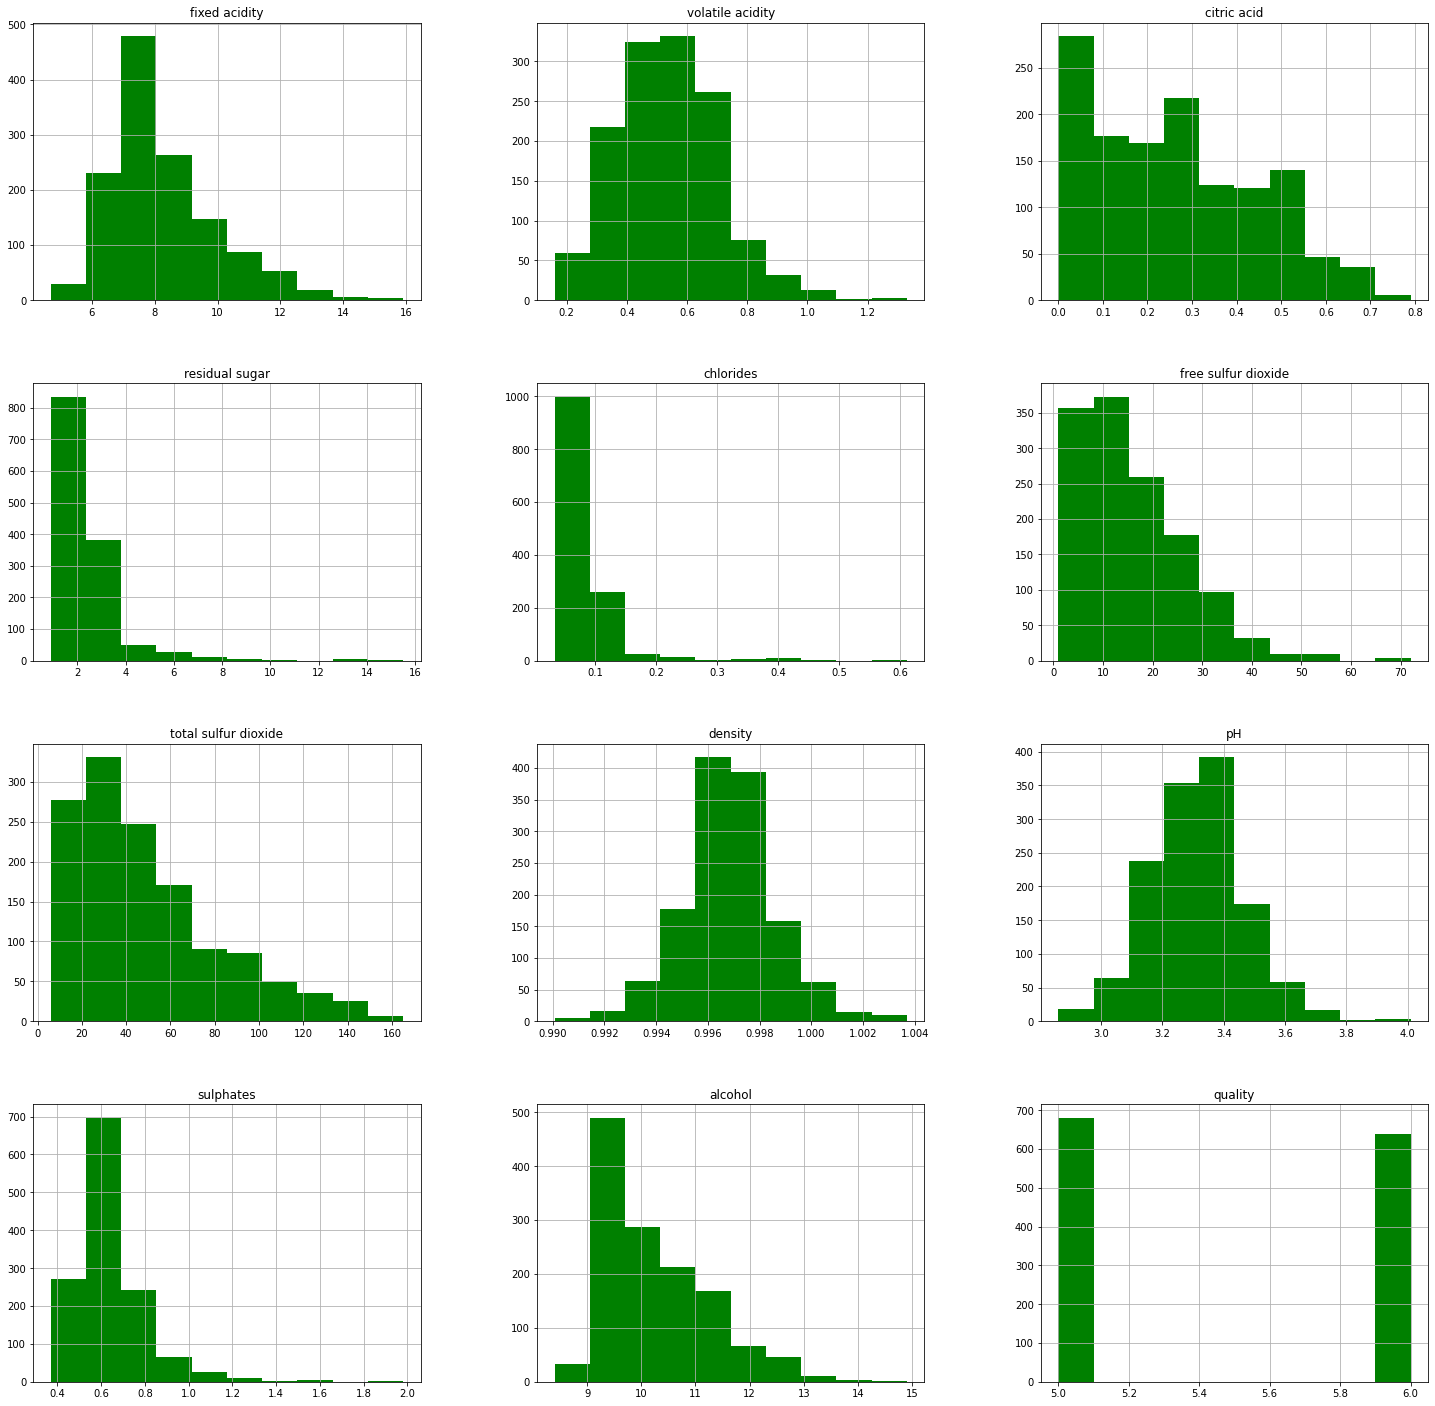

In [ ]:
hists = df.hist(figsize=(25,25), color = 'green')

**Conclusión**: Se observa que la mayoría de nuestras variables tienen una distribución normal.

### Identificar valores atípicos

#### Creación de Boxplots

In [ ]:
numericas = df.select_dtypes(['int64','float64']).columns


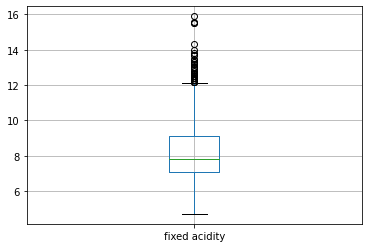

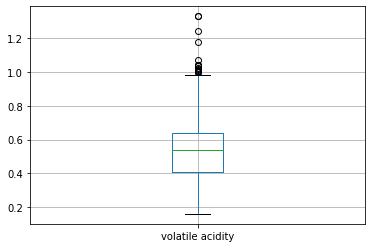

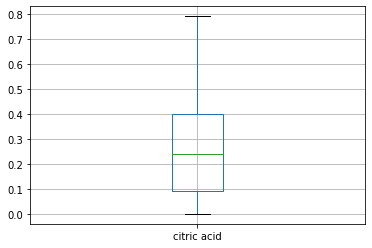

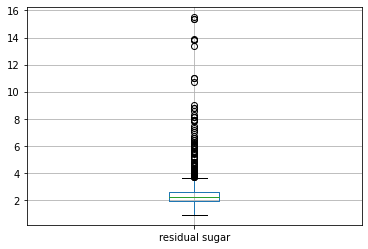

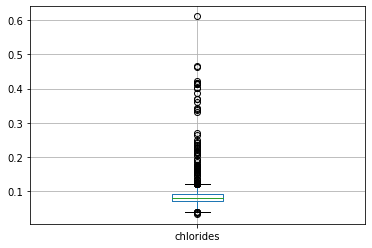

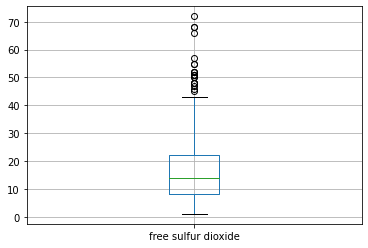

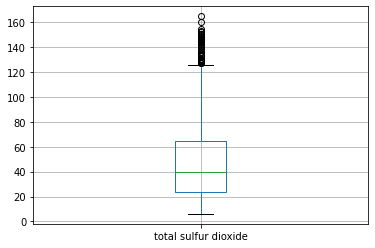

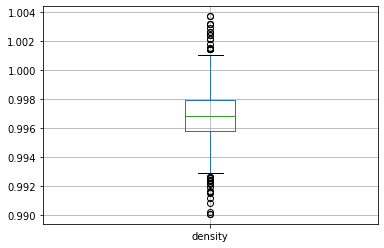

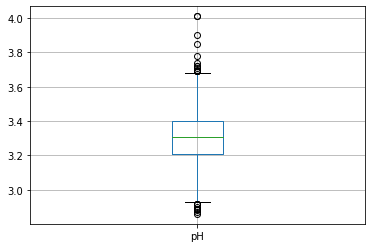

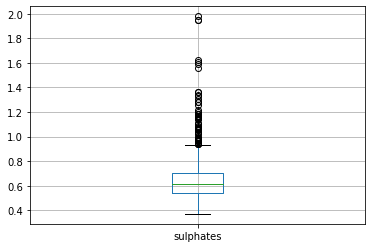

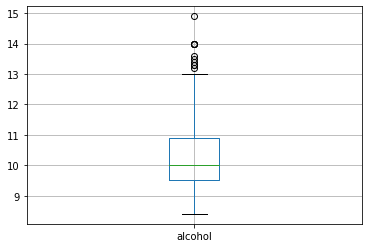

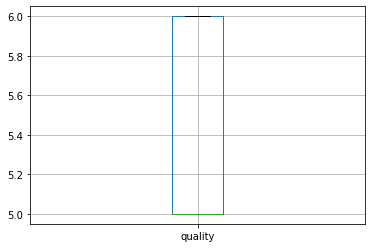

In [ ]:
for column in numericas:
    plt.figure()
    df.boxplot([column])

**Conclusión**: Los datos que conforman nuestras variables poseen una cantidad considerable de datos atípicos.

#### Outliers por cuantil (95%)

In [ ]:
(df[numericas]>df[numericas].quantile(0.95)).sum()

fixed acidity           62
volatile acidity        66
citric acid             61
residual sugar          65
chlorides               64
free sulfur dioxide     63
total sulfur dioxide    62
density                 59
pH                      63
sulphates               64
alcohol                 61
quality                  0
dtype: int64

#### Outliers por cuantil (5%)

In [ ]:
(df[numericas]<df[numericas].quantile(0.05)).sum()

fixed acidity           66
volatile acidity        59
citric acid              0
residual sugar          61
chlorides               64
free sulfur dioxide     66
total sulfur dioxide    53
density                 66
pH                      65
sulphates               62
alcohol                 54
quality                  0
dtype: int64

**Conclusión**: El Dataset no contiene datos nulos. Gracias a la información que nos da la Estadística Descriptiva se observa que hay una gran diferencia entre el tercer percentil y el valor maximo en varias caracteristicas lo que puede indicar la presencia de datos atipicos. 


# Sección 6 - Selección de variable a estudiar.


<function matplotlib.pyplot.show(*args, **kw)>

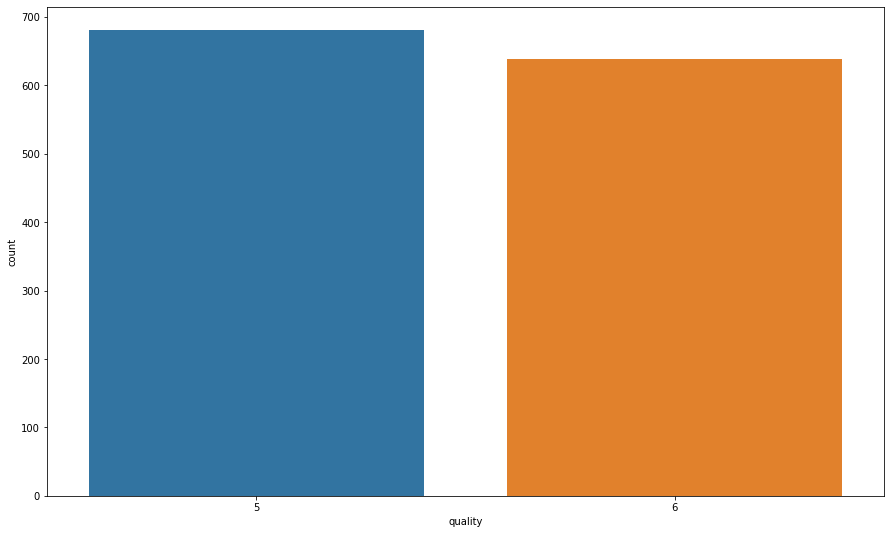

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='quality')
plt.show

Para favorecer la visualización y el tratamiento de los datos se ha decidido enfocarse en los valores de calidad 5 y 6 ya que se posee mayor cantidad de muestras en este rango de calificaciones. 

# Sección 7 - Separación de datos: Prueba y Entrenamiento

In [ ]:
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df):
    print(len(train_index))
    print(len(test_index))
df['Train'] = 0
df.loc[df.index.isin(train_index),'Train'] = 1

923
396


### Cortar atípicos al rango de outliers

In [ ]:
for var in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    lim_sup = df.loc[df['Train']==1, var].quantile(0.95)
    lim_inf = df.loc[df['Train']==1, var].quantile(0.05)
    df[var].clip(lim_inf, lim_sup, inplace=True)

# Sección 8 - Análisis de correlación entre variables.

### Relaciones matemáticas

In [ ]:
df[df['Train']==1].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.238992     0.682620   
volatile acidity          -0.238992          1.000000    -0.557799   
citric acid                0.682620         -0.557799     1.000000   
residual sugar             0.198979          0.063507     0.099285   
chlorides                  0.117192          0.121744     0.118897   
free sulfur dioxide       -0.153200         -0.014723    -0.043473   
total sulfur dioxide      -0.129210          0.087220     0.034230   
density                    0.652821          0.023975     0.370863   
pH                        -0.650360          0.196360    -0.524553   
sulphates                  0.241492         -0.242902     0.333966   
alcohol                    0.055822         -0.177685     0.118344   
quality                    0.108658         -0.292764     0.101558   
Train                           NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.198979   0.117192            -0.153200   
volatile acidity            0.063507   0.121744            -0.014723   
citric acid                 0.099285   0.118897            -0.043473   
residual sugar              1.000000   0.176254             0.129063   
chlorides                   0.176254   1.000000             0.030851   
free sulfur dioxide         0.129063   0.030851             1.000000   
total sulfur dioxide        0.197443   0.139391             0.706184   
density                     0.463456   0.267753            -0.024850   
pH                         -0.083917  -0.223816             0.083779   
sulphates                   0.015624   0.205906             0.052316   
alcohol                     0.084664  -0.171004            -0.068703   
quality                    -0.078401  -0.108418            -0.086084   
Train                            NaN        NaN                  NaN   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.129210  0.652821 -0.650360   0.241492   
volatile acidity                  0.087220  0.023975  0.196360  -0.242902   
citric acid                       0.034230  0.370863 -0.524553   0.333966   
residual sugar                    0.197443  0.463456 -0.083917   0.015624   
chlorides                         0.139391  0.267753 -0.223816   0.205906   
free sulfur dioxide               0.706184 -0.024850  0.083779   0.052316   
total sulfur dioxide              1.000000  0.091786 -0.031186   0.032970   
density                           0.091786  1.000000 -0.286842   0.199958   
pH                               -0.031186 -0.286842  1.000000  -0.181364   
sulphates                         0.032970  0.199958 -0.181364   1.000000   
alcohol                          -0.241919 -0.372274  0.129505   0.106824   
quality                          -0.275426 -0.125073 -0.021577   0.198839   
Train                                  NaN       NaN       NaN        NaN   

                       alcohol   quality  Train  
fixed acidity         0.055822  0.108658    NaN  
volatile acidity     -0.177685 -0.292764    NaN  
citric acid           0.118344  0.101558    NaN  
residual sugar        0.084664 -0.078401    NaN  
chlorides            -0.171004 -0.108418    NaN  
free sulfur dioxide  -0.068703 -0.086084    NaN  
total sulfur dioxide -0.241919 -0.275426    NaN  
density              -0.372274 -0.125073    NaN  
pH                    0.129505 -0.021577    NaN  
sulphates             0.106824  0.198839    NaN  
alcohol               1.000000  0.381036    NaN  
quality               0.381036  1.000000    NaN  
Train                      NaN       NaN    NaN

In [ ]:
results_corr = df.corr(method = 'pearson').loc['quality']
df_corr = pd.DataFrame(data = np.array(results_corr), index = results_corr.index, columns = ['Corr']).sort_values(by=['Corr'], ascending=False)
df_corr

Corr
quality               1.000000
alcohol               0.394502
sulphates             0.219787
citric acid           0.079925
fixed acidity         0.063664
pH                    0.038503
residual sugar       -0.032832
Train                -0.051385
free sulfur dioxide  -0.058596
chlorides            -0.126633
density              -0.129557
volatile acidity     -0.237680
total sulfur dioxide -0.239752

### Relaciones gráficas

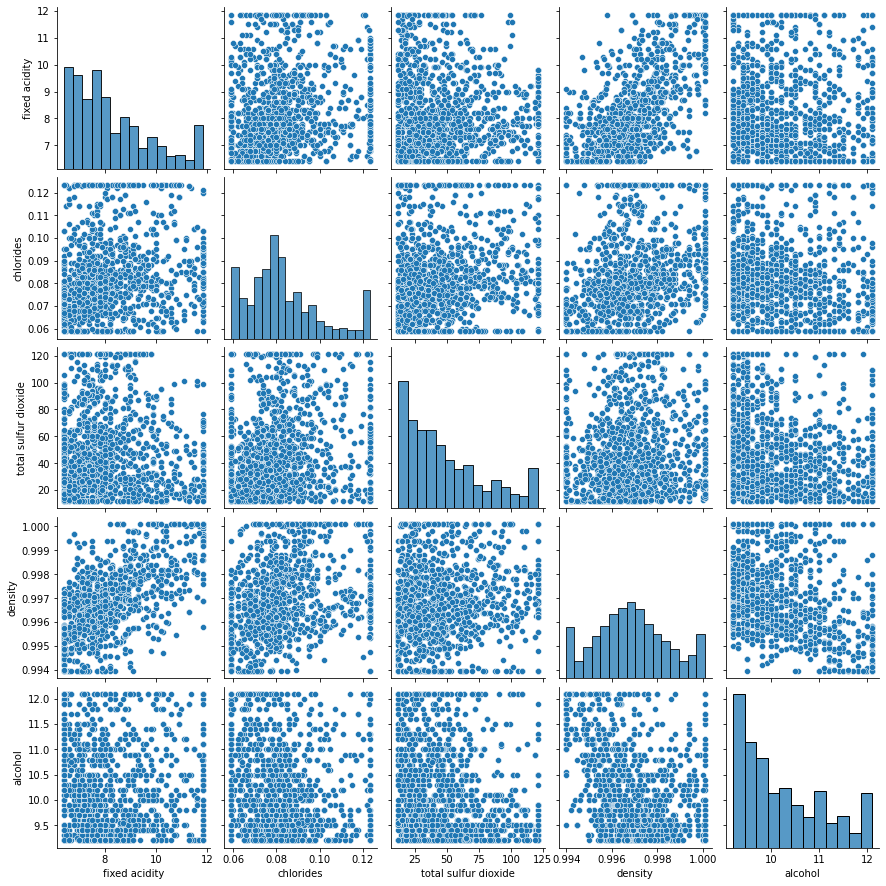

In [ ]:
sns.pairplot(df[['fixed acidity',
       'chlorides', 'total sulfur dioxide', 'density','alcohol']]).savefig('graficas.png')

### Relaciones gráficas en clasificación

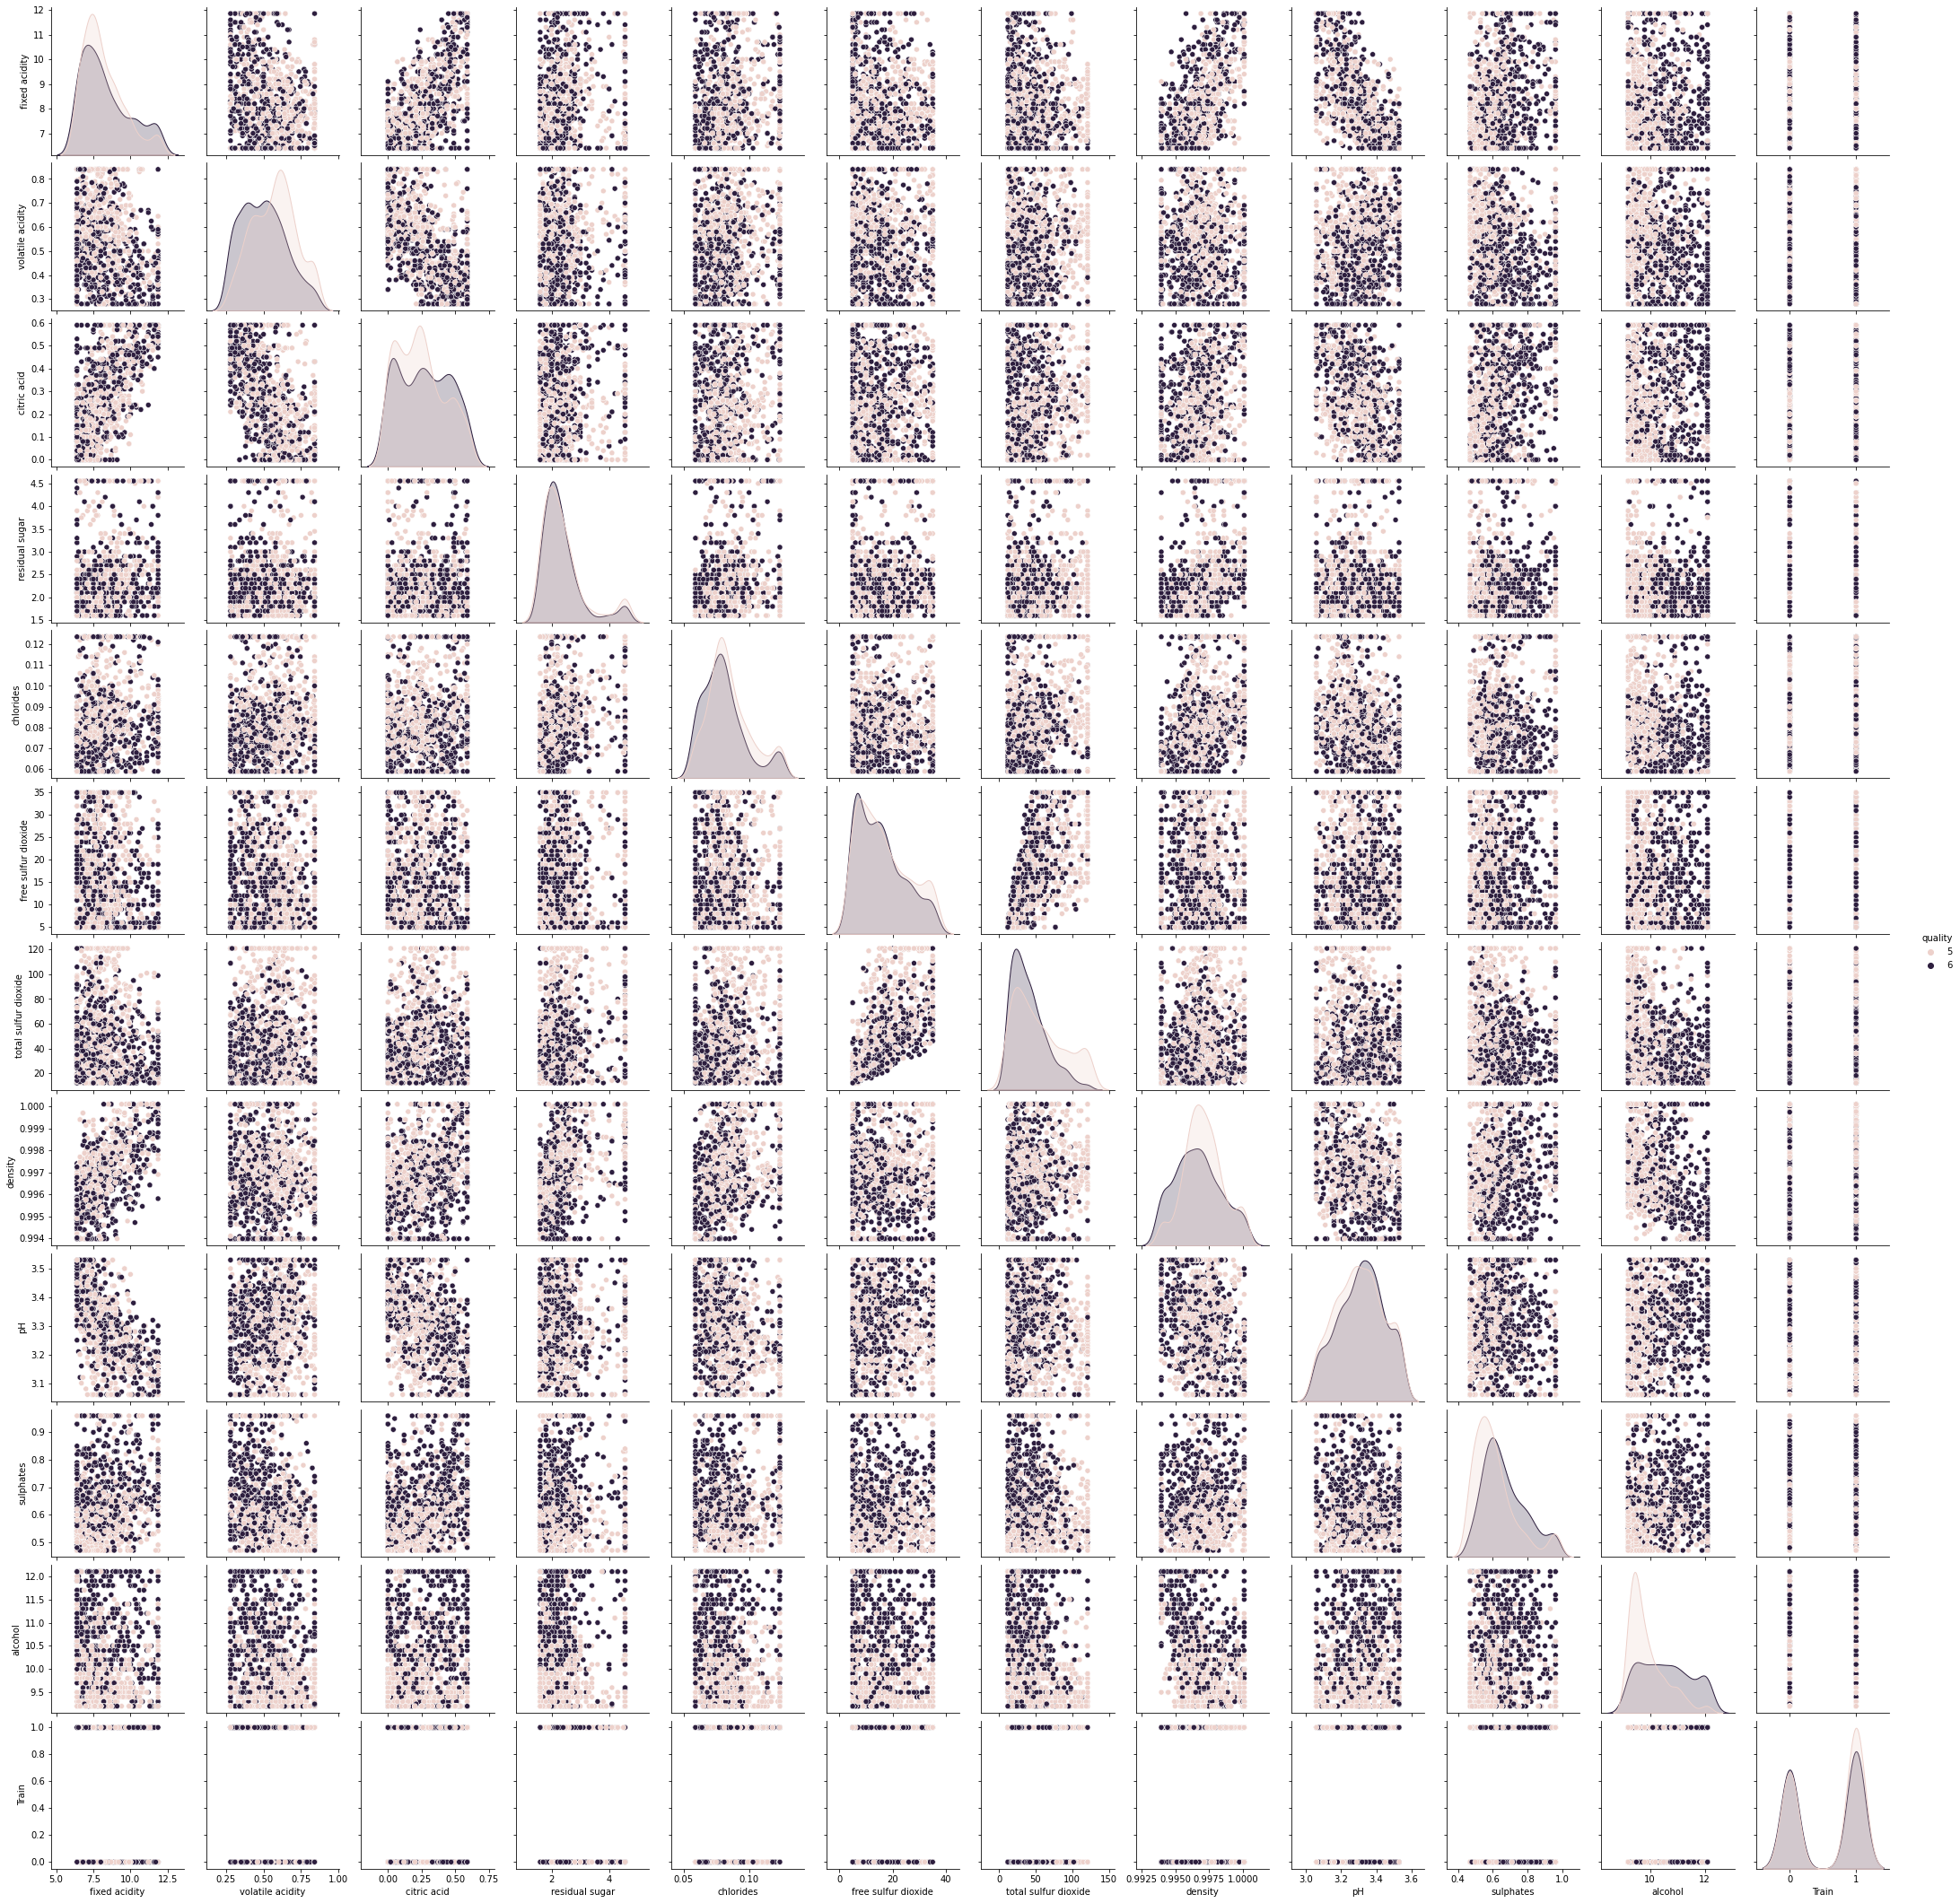

In [ ]:
sns.pairplot(df, hue = 'quality').savefig('graficas2.png')

### 8.1- Conclusiones:

Se observa que las variables que tienen una correlación más fuerte entre sí son:

(Positivamente)

*   fixed acidity - citric acid
*   fixed acidity - density
*   free sulfur dioxide - total sulfur dioxide


(Negativamente)


*   fixed acidity - pH
*   Volatile acidity - citric acid
*   citric acid - pH


Por otra parte, como nuestro trabajo se centra en el estudio de los factores que afectan a la calidad nos centraremos en esta variable es por eso que se observa que las variables que mayor relación tienen con la calidad son:

(Positivamente)

*   Alcohol
*   Sulphates


(Negativamente)

*   Volatile acidity











```
# Esto tiene formato de código
```

A continuación se puede observar graficamente lo expuesto anteriormente.

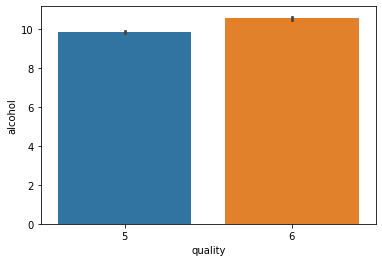

In [ ]:
sns.barplot(data = df, y = "alcohol", x = "quality")


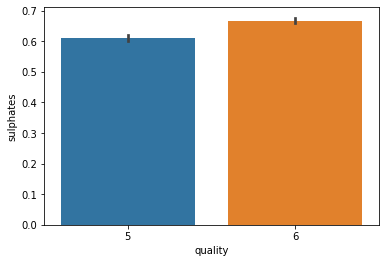

In [ ]:
sns.barplot(data = df, y = "sulphates", x = "quality")


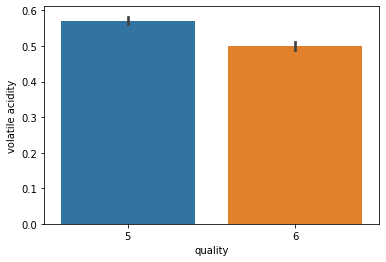

In [ ]:
sns.barplot(data = df, y = "volatile acidity", x = "quality")

**Conclusión**: Con ayuda de estos tres gráficos podemos decir que a mayor cantidad de "sulfathes" y "alcohol" la calidad del vino es mejor mientras que la cantidad de la variable "volatile acidity"

# Sección 9 - Análisis de componentes principales.

### PCA

In [ ]:
df.var(axis=0)

fixed acidity             2.276033
volatile acidity          0.022953
citric acid               0.032958
residual sugar            0.541042
chlorides                 0.000289
free sulfur dioxide      83.654179
total sulfur dioxide    943.284814
density                   0.000003
pH                        0.017547
sulphates                 0.016194
alcohol                   0.760859
quality                   0.249924
Train                     0.245478
dtype: float64

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1        0.488397         -0.214021     0.444288        0.182565   0.241459   
PC2       -0.113931          0.341971    -0.188817        0.186162   0.220491   
PC3       -0.107811         -0.299684     0.170011        0.168447  -0.101627   
PC4       -0.018803          0.348661    -0.180950        0.642606   0.271670   
PC5       -0.114615          0.016212    -0.030448       -0.338153   0.394606   
PC6       -0.153543          0.031131    -0.152797       -0.270327   0.307391   
PC7       -0.064898         -0.263793    -0.005327        0.088299  -0.497773   
PC8       -0.239249         -0.357260     0.230178        0.200191   0.311768   
PC9        0.211708          0.457048    -0.016966       -0.085007  -0.403189   
PC10       0.342841          0.167360     0.201329       -0.439539   0.202264   
PC11      -0.189681          0.276948     0.482101       -0.058941  -0.084553   
PC12      -0.220907          0.337266     0.592376        0.121329  -0.031298   
PC13       0.625466         -0.008510    -0.062238        0.191795   0.046553   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC1             -0.044401              0.054688  0.426678 -0.410344   
PC2              0.325054              0.458320  0.204176  0.000896   
PC3              0.599697              0.470206 -0.146263  0.085190   
PC4             -0.120451             -0.154554  0.230297  0.248241   
PC5             -0.053664             -0.046082 -0.049561 -0.035104   
PC6              0.045221             -0.001206 -0.019924  0.132726   
PC7             -0.050532             -0.116646  0.426899  0.482387   
PC8             -0.191806             -0.065571 -0.192253  0.226672   
PC9              0.011210              0.028083 -0.071109 -0.184144   
PC10             0.235602             -0.024474  0.302114  0.533554   
PC11            -0.534375              0.537438 -0.043994  0.172396   
PC12             0.360740             -0.476257 -0.201990  0.016245   
PC13            -0.051299              0.069946 -0.583700  0.333522   

      sulphates   alcohol   quality     Train  
PC1    0.210024 -0.127277 -0.004682  0.104443  
PC2   -0.168588 -0.425851 -0.423129  0.070264  
PC3    0.271148  0.273754  0.222711 -0.153351  
PC4    0.194503  0.285861  0.254096 -0.146372  
PC5    0.417659 -0.238090 -0.041846 -0.688508  
PC6    0.510943 -0.107722  0.215684  0.667305  
PC7    0.278755 -0.383061 -0.107426 -0.059317  
PC8    0.063162  0.249959 -0.644907  0.114293  
PC9    0.498045  0.314312 -0.434911  0.018556  
PC10  -0.216883  0.309415 -0.063557 -0.030612  
PC11  -0.000692 -0.048052  0.189503  0.002000  
PC12  -0.003404 -0.262788  0.041875  0.044726  
PC13   0.061817 -0.319988  0.014363  0.002522

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

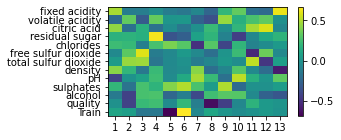

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.24293441 0.16812433 0.12359262 0.0868672  0.07681577 0.0702918
 0.05854517 0.05196543 0.04427658 0.03287778 0.0236906  0.01487723
 0.00514107]


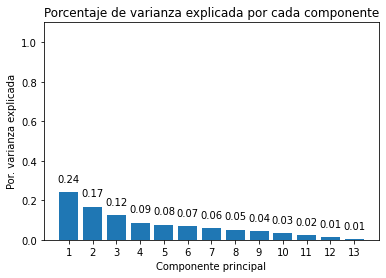

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 24% de la varianza observada en los datos y la segunda el 17%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.24293441 0.41105874 0.53465136 0.62151857 0.69833434 0.76862614
 0.82717131 0.87913674 0.92341332 0.9562911  0.97998171 0.99485893
 1.        ]


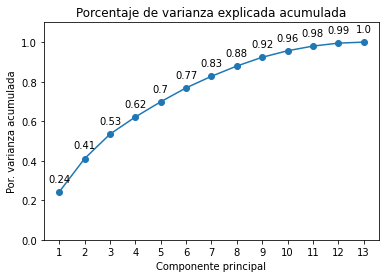

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las tres primeras componentes se conseguiría explicar el 53% de la varianza observada.



##Trasformación


Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12', 'PC13'],
    index   = df.index
)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.640025  1.195733 -1.848952  0.001674 -0.443843  0.706509  1.214433   
1 -0.610656  2.307608 -0.118295  0.815716  1.386397 -0.309796 -1.001349   
2 -0.504786  1.589721 -1.163808  0.230841 -0.062863  0.877368 -0.531860   
3  2.661818 -1.079086  0.403112 -1.753863 -1.009785 -0.118477  0.095317   
4 -1.640025  1.195733 -1.848952  0.001674 -0.443843  0.706509  1.214433   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.016451  0.110305  0.650932 -0.055724 -0.226913  0.001131  
1 -0.646053  1.085859 -0.366008 -0.658786  0.017002 -0.107636  
2 -0.066478  0.821191 -0.280244 -0.211237 -0.188942 -0.117038  
3 -0.907273 -0.791274  0.402404  0.191217 -0.161356  0.368015  
4 -0.016451  0.110305  0.650932 -0.055724 -0.226913  0.001131

La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [ ]:
proyecciones = np.dot(modelo_pca.components_, scale(df).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12','PC13'])
proyecciones = proyecciones.transpose().set_index(df.index)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.640025  1.195733 -1.848952  0.001674 -0.443843  0.706509  1.214433   
1 -0.610656  2.307608 -0.118295  0.815716  1.386397 -0.309796 -1.001349   
2 -0.504786  1.589721 -1.163808  0.230841 -0.062863  0.877368 -0.531860   
3  2.661818 -1.079086  0.403112 -1.753863 -1.009785 -0.118477  0.095317   
4 -1.640025  1.195733 -1.848952  0.001674 -0.443843  0.706509  1.214433   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.016451  0.110305  0.650932 -0.055724 -0.226913  0.001131  
1 -0.646053  1.085859 -0.366008 -0.658786  0.017002 -0.107636  
2 -0.066478  0.821191 -0.280244 -0.211237 -0.188942 -0.117038  
3 -0.907273 -0.791274  0.402404  0.191217 -0.161356  0.368015  
4 -0.016451  0.110305  0.650932 -0.055724 -0.226913  0.001131

###Reconstrucción
Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [ ]:
# Recostruccion de las proyecciones
# ==============================================================================
#Para ejecutar la reconstruccion descomentar las variables de abajo
#recostruccion = pca_pipe.inverse_transform(X=proyecciones)
#recostruccion = pd.DataFrame(
                    #recostruccion,
                    #columns = datos.columns,
                    #index   = datos.index
#)
#print('------------------')
#print('Valores originales')
#print('------------------')
#display(recostruccion.head())

#print('---------------------')
#print('Valores reconstruidos')
#print('---------------------')
#display(datos.head())

# Entrenamiento de Algoritmos

### Variables seleccionadas

In [ ]:
varSelected = ['alcohol', 'sulphates', 'volatile acidity']

### Preparación Final de Datos

In [ ]:
X_train = df.loc[df['Train']==1, varSelected]
y_train = df.loc[df['Train']==1, 'quality']

X_test = df.loc[df['Train']==0, varSelected]
y_test = df.loc[df['Train']==0, 'quality']

### KNN

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 

In [ ]:
# Graficamos mejor la cantidad de graduacion alcoholica y confirmamos que la mayoría de los vinos tienen entre 9 y 14 de graduacion alcoholica.
print(df.groupby('alcohol').size())



alcohol
9.200000     121
9.233333       1
9.250000       1
9.300000      57
9.400000     101
9.500000     137
9.550000       2
9.566667       1
9.600000      53
9.700000      49
9.800000      72
9.900000      43
10.000000     54
10.033333      2
10.100000     44
10.200000     41
10.300000     31
10.400000     37
10.500000     56
10.550000      1
10.600000     22
10.700000     25
10.750000      1
10.800000     31
10.900000     40
11.000000     41
11.066667      1
11.100000     22
11.200000     23
11.300000     23
11.400000     27
11.500000     22
11.600000      9
11.700000     10
11.800000     17
11.900000     15
11.950000      1
12.000000     11
12.100000     74
dtype: int64


##Preparamos las entradas
Creamos nuestro X e y de entrada y los sets de entrenamiento y test.

In [ ]:
X = df[['sulphates','alcohol']].values
y = df['quality'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Usaremos k-Nearest Neighbor con Scikit Learn

In [ ]:
n_neighbors = 16
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.67


Vemos que la precisión que nos da es de 72% en el set de entrenamiento y del 67% para el de test.

###Precisión del modelo


In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[119  46]
 [ 62 103]]
              precision    recall  f1-score   support

           5       0.66      0.72      0.69       165
           6       0.69      0.62      0.66       165

    accuracy                           0.67       330
   macro avg       0.67      0.67      0.67       330
weighted avg       0.67      0.67      0.67       330



Cómo se ve la puntuación F1 es del 67%, no es tan buena nota, pero continuaremos

##Grafico del KNN

Ahora realizaremos la grafica con la clasificación obtenida, la que nos ayuda a ver fácilmente en donde caerán las predicciones

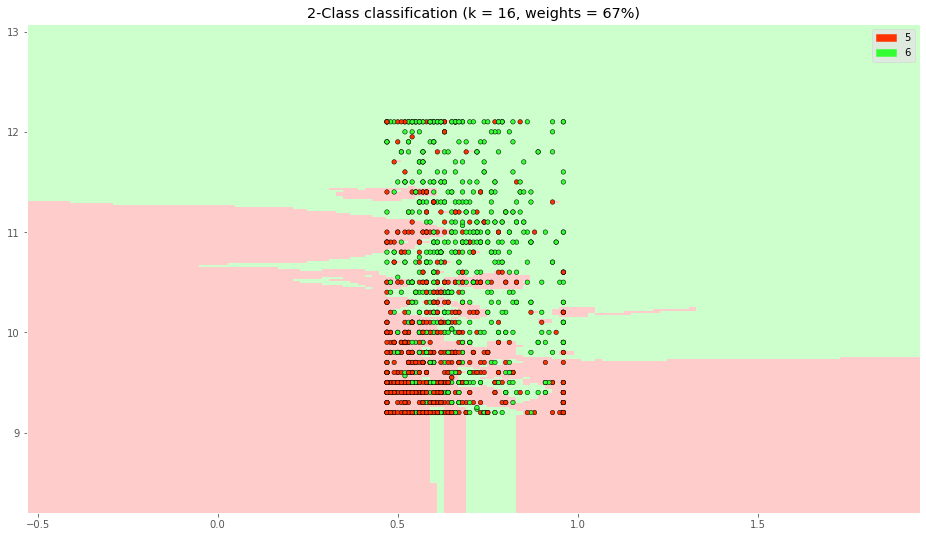

In [ ]:
h = .02  # tamaño de la muestra

# Creamos el mapa de colores
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC'])
cmap_bold = ListedColormap(['#FF3300', '#33FF33'])

# creamos una instancia de Neighbors Classifier y ajustamos los datos.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Trazamos el límite de decisión. Para ello, asignaremos un color a cada punto de la muestra [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Ponemos el resultado en un diagrama de color.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Trazamos también los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF3300', label='5')
patch1 = mpatches.Patch(color='#33FF33', label='6')

plt.legend(handles=[patch0, patch1])

    
plt.title("2-Class classification (k = 16, weights = 67%)" )

plt.show()

**Conclusión:** 
A 'ojo' podemos observar una region muy fuerte que indica que hay una tendencia de que los vinos que tienen una calidad de 5 'estrellas' generalmente tienen de graducion alcoholica de entre 9 y 10 con una cantidad de sulfitos ubicada claramente al rededor de entre los 0.5 y 1.0
Tambien se puede observar que aquellos que tienen una calidad de 6 'estrellas' se distribuyen generalmente entre las graduaciones alcoholicas de 11 y 13, con una cantidad de sulfitos generalmente oscilando entre los 0.5 y 1.

##Elegir el mejor valor de k

Antes vimos que asignamos el valor n_neighbors=16 como valor de “k” y obtuvimos buenos resultados. ¿Pero de donde salió ese valor?. Pues realmente tuve que ejecutar este código que viene a continuación, donde vemos distintos valores k y la precisión obtenida.

([<matplotlib.axis.XTick at 0x7fc060388100>,
 <a list of 6 Text major ticklabel objects>)

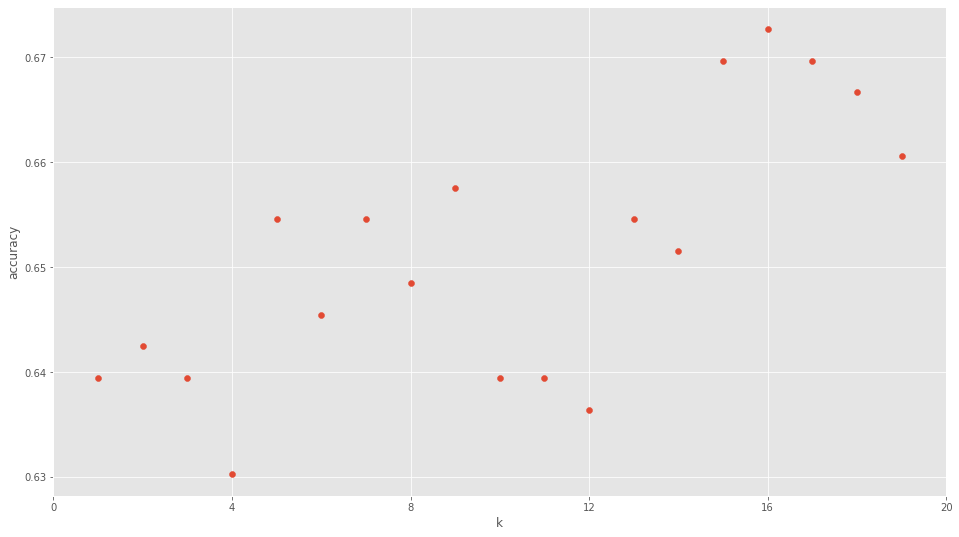

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,4,8,12,16,20])

En la gráfica vemos que con valores k=16 es donde mayor precisión se logra.



##Clasificar y/o Predecir nuevas muestras


Ya tenemos nuestro modelo y nuestro valor de k. Ahora, lo lógico será usarlo! Pues supongamos que nos llegan nuevos vinos! veamos como predecir su calidad de 2 maneras. La primera:

In [ ]:
print(clf.predict([[1, 12]]))

[6]


Este resultado nos indica que para un vino con una cantidad de 1 sulfito  y graduacion alcoholica 12, nos valorara el vino con una calidad de 6 'estrellas'.

Pero también podríamos obtener las probabilidades que de nos den vinos de calidad 5 o 6 'estrellas' con predict_proba():

In [ ]:
print(clf.predict_proba([[12, 1]]))

[[0.68711538 0.31288462]]


Aquí vemos que para las coordenadas 12, 1 hay 68.71% probabilidades que haya un vino de calidad de '6' estrellas. Puedes comprobar en el gráfico anterior, que encajan en las zonas que delimitamos anteriormente.